# Import Libraries

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
%matplotlib inline

## <font color="green">Original Image</font>

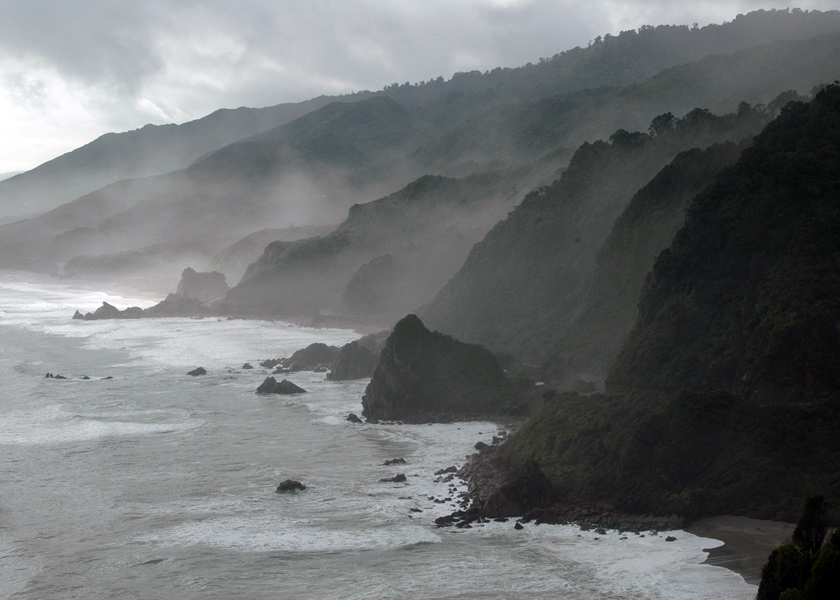

In [48]:
img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display image
Image(filename="New_Zealand_Coast.jpg")

# Addition or Brightness
The first operation is simple addition of images. This results in increasing or decreasing the brightness of the image since we are eventually increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in a global increase/decrease in brightness.

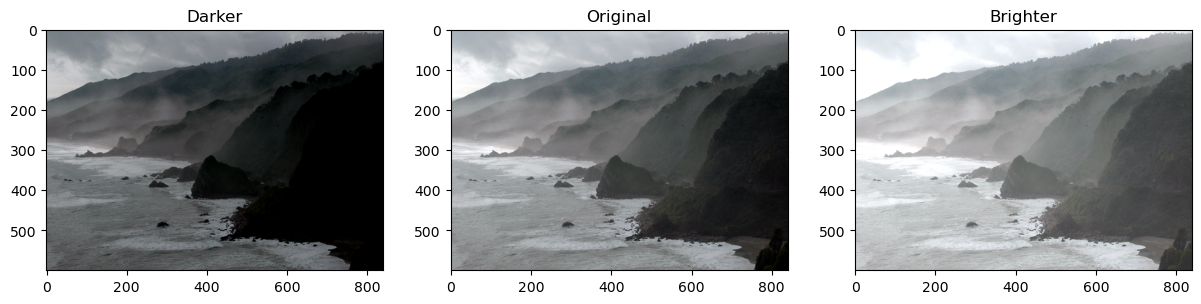

In [49]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

# Show the images
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_rgb_darker);plt.title("Darker");
plt.subplot(142);plt.imshow(img_rgb);plt.title("Original");
plt.subplot(143);plt.imshow(img_rgb_brighter);plt.title("Brighter");

# Multiplication or Contrast
Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image.

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

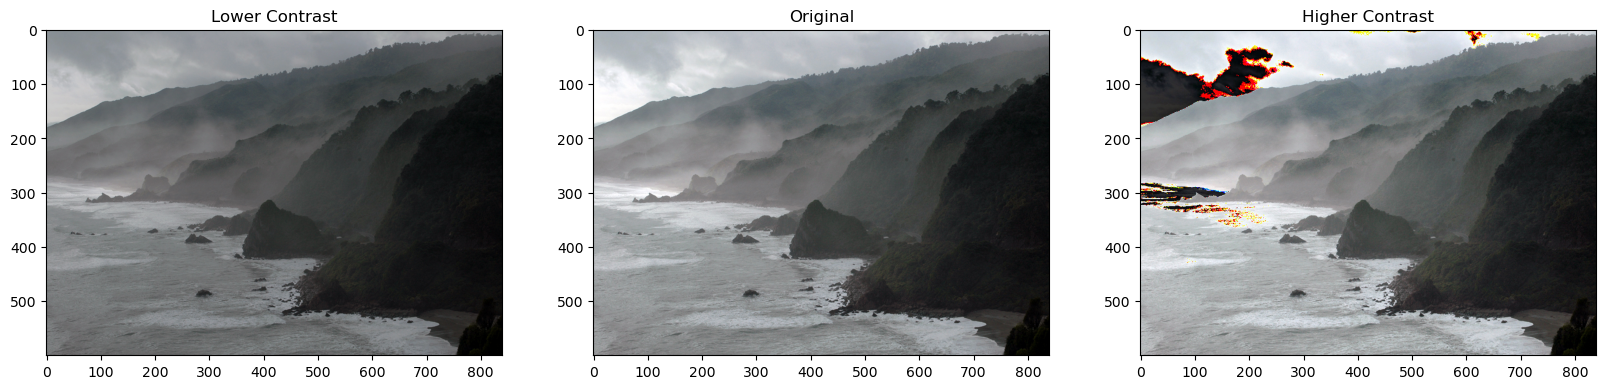

In [50]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# Show the images
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(img_rgb_darker);plt.title("Lower Contrast");
plt.subplot(132);plt.imshow(img_rgb);plt.title("Original");
plt.subplot(133);plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

## <font color="green">What happened?</font>
Can you see the weird colors in some areas of the image after multiplication?

The issue is that after multiplying, the values which are already high, are becoming greater than 255. Thus, the overflow issue. How do we overcome this?

## <font color="green">Handling Overflow using np.clip</font>

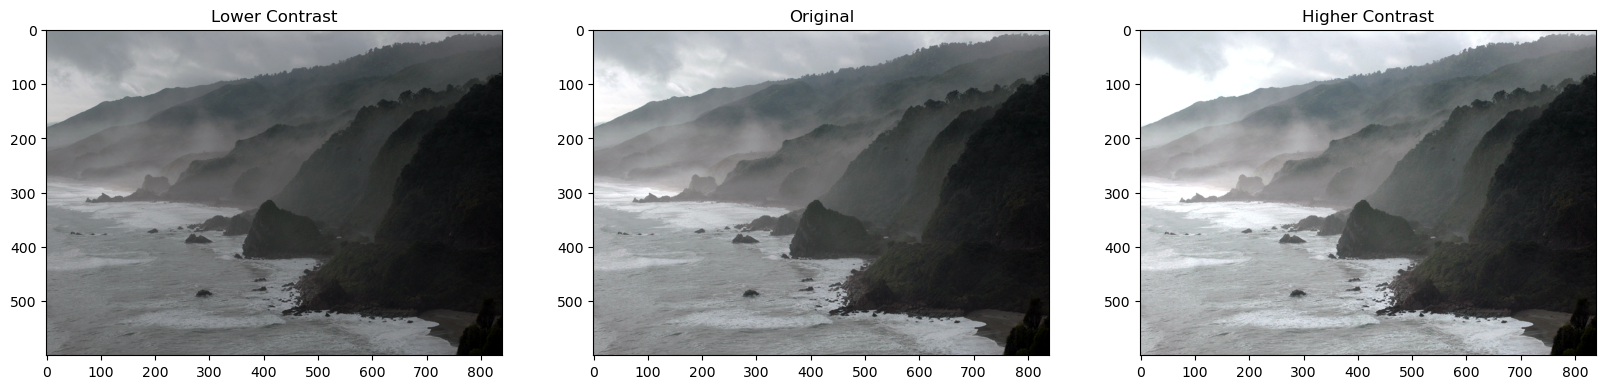

In [51]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0,255))

# Show the images
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(img_rgb_lower);plt.title("Lower Contrast");
plt.subplot(132);plt.imshow(img_rgb);plt.title("Original");
plt.subplot(133);plt.imshow(img_rgb_higher);plt.title("Higher Contrast");

# Image Thresholding

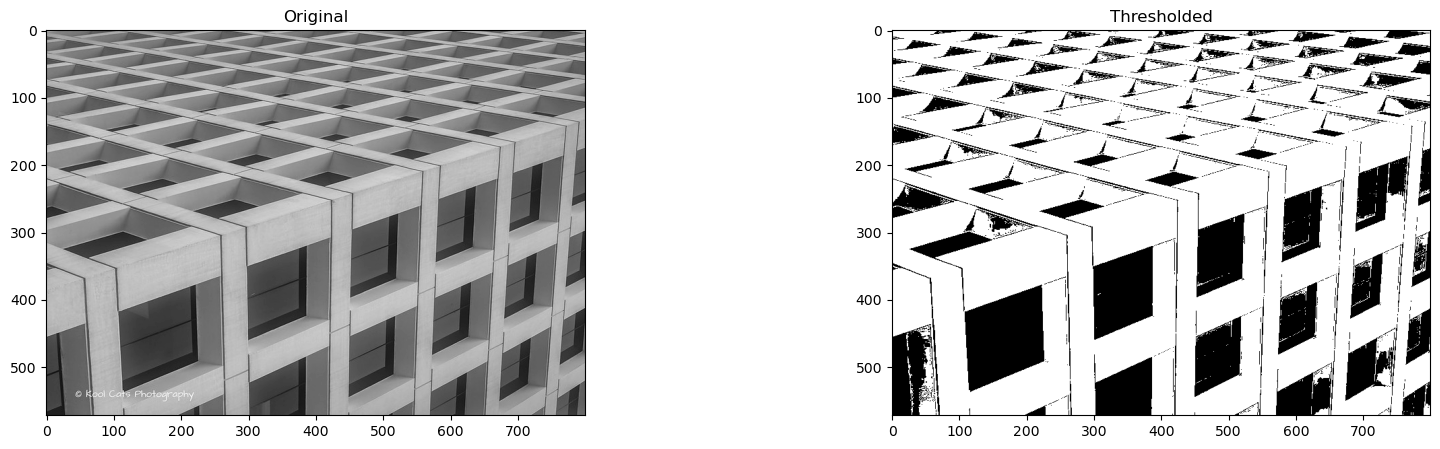

In [52]:
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(img_read, cmap="gray");plt.title("Original");
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded");

## Application: Sheet Music Reader
Suppose we wanted to build an application that could read (decode) sheet music. This is similar to
Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding
techniques.

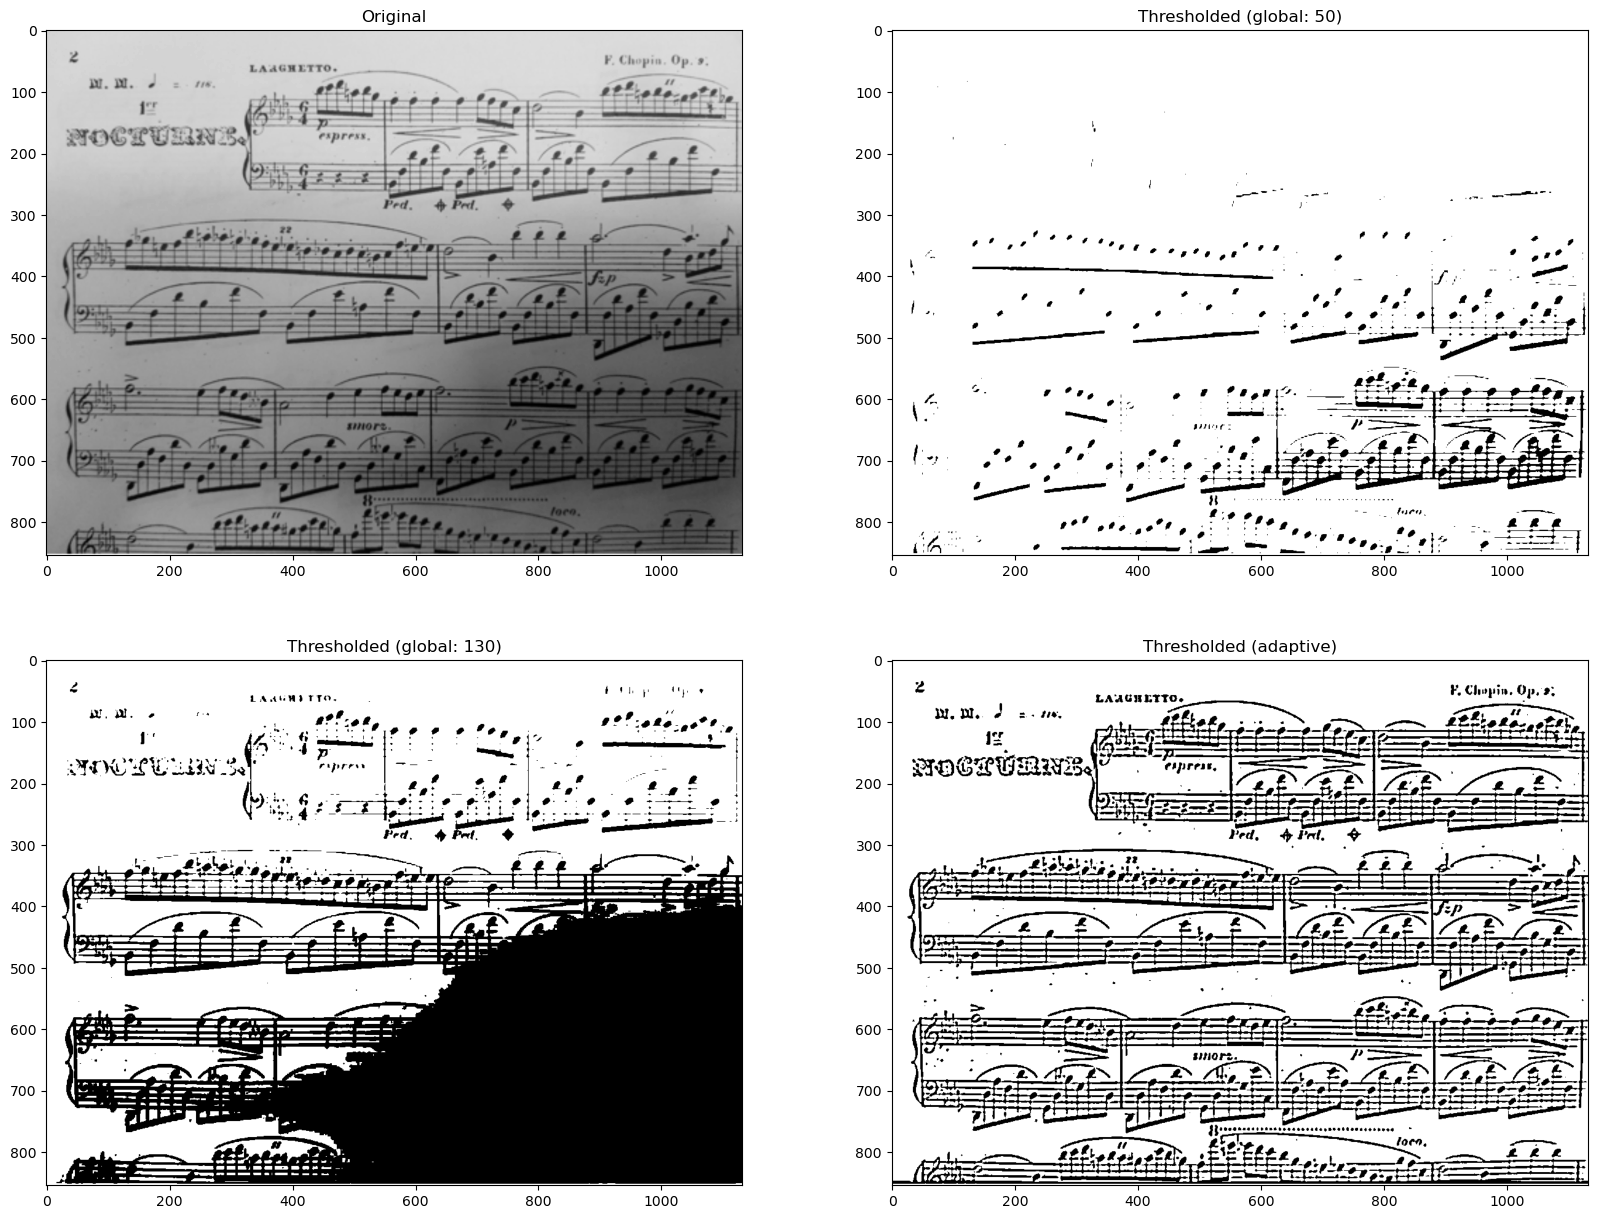

In [53]:
img_read = cv2.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gb_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gb_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[20,15])
plt.subplot(221);plt.imshow(img_read, cmap="gray");plt.title("Original");
plt.subplot(222);plt.imshow(img_thresh_gb_1, cmap="gray");plt.title("Thresholded (global: 50)");
plt.subplot(223);plt.imshow(img_thresh_gb_2, cmap="gray");plt.title("Thresholded (global: 130)");
plt.subplot(224);plt.imshow(img_thresh_adp, cmap="gray");plt.title("Thresholded (adaptive)");

# Bitwise Operations

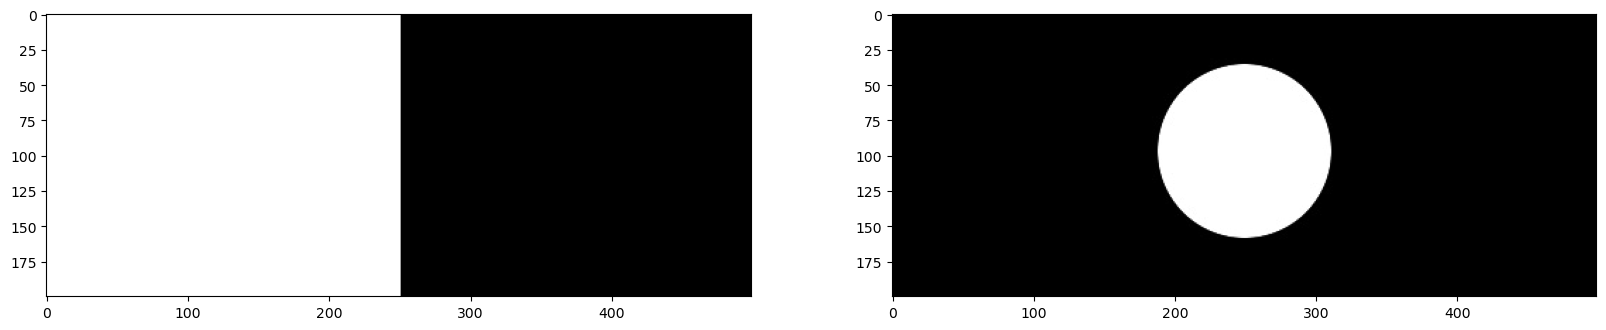

In [54]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

# Show the images
plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray");
plt.subplot(122);plt.imshow(img_cir, cmap="gray");

## <font color="green">Bitwise AND Operator</font>

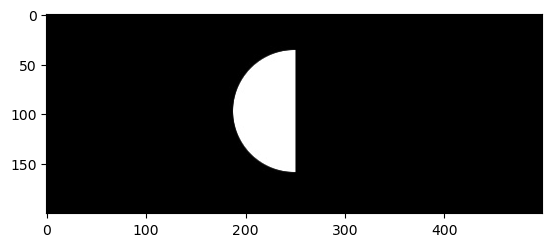

In [55]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

## <font color="green">Bitwise OR Operator</font>

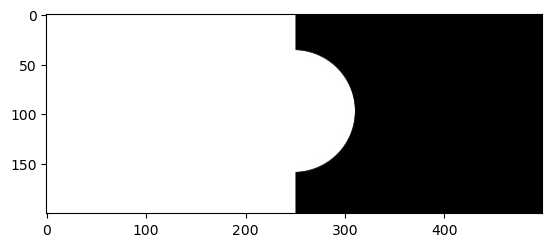

In [56]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

## <font color="green">Bitwise XOR Operator</font>

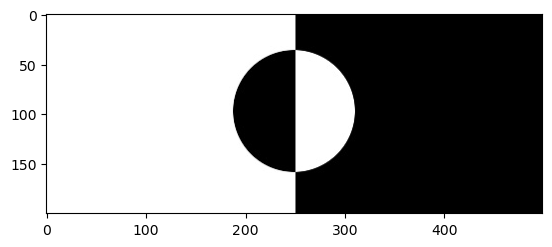

In [57]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

# Application: Logo Manipulation

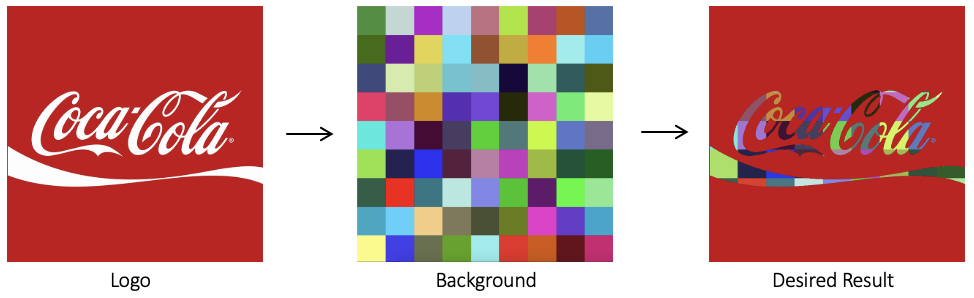

In [58]:
Image(filename="Logo_Manipulation.png")

## <font color="green">Read Foreground Image</font>

(700, 700, 3)


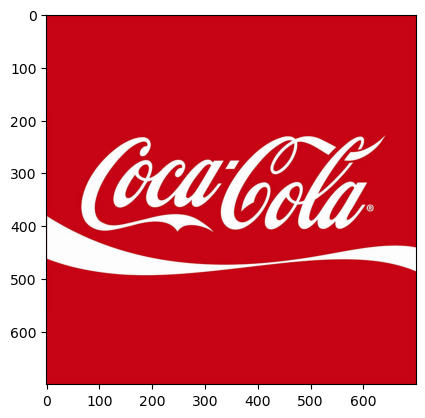

In [61]:
img_bgr = cv2.imread("coca-cola-logo.png", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

## <font color="green">Read Background Image</font>

(700, 700, 3)


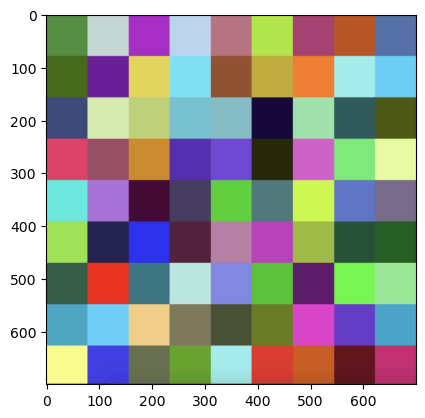

In [62]:
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# aspect_ratio = logo_w / img_background_rgb.shape[1]
# dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

img_background_rgb = cv2.resize(img_background_rgb, (logo_w, logo_h), interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

## <font color="green">Create Mask for Original Image</font>

(700, 700)


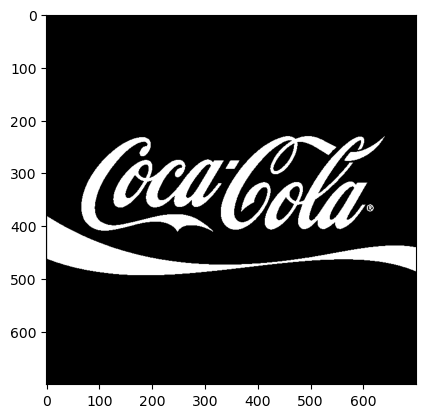

In [64]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to create a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

## <font color="green">Invert the Mask</font>

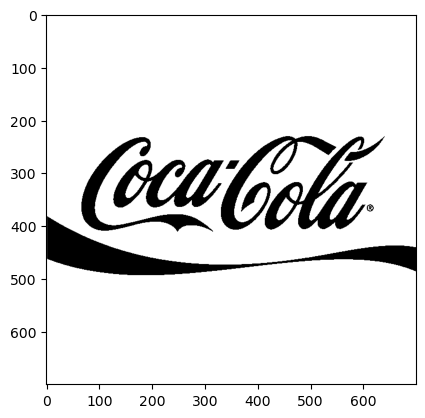

In [65]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

## <font color="green">Apply Background on the Mask</font>

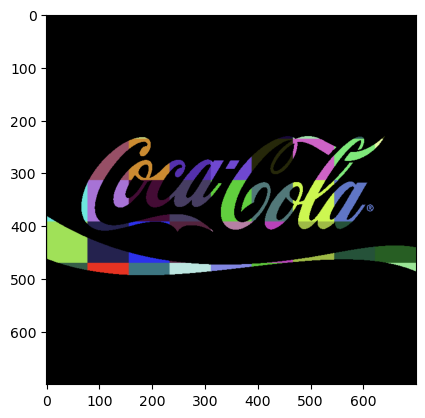

In [66]:
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

## <font color="green">Image Foreground from Image</font>

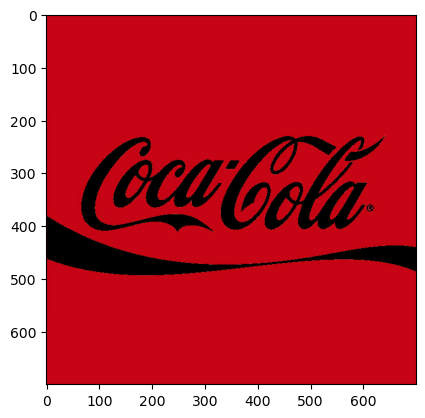

In [67]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

## <font color="green">Read: Merge Foreground and Background</font>

True

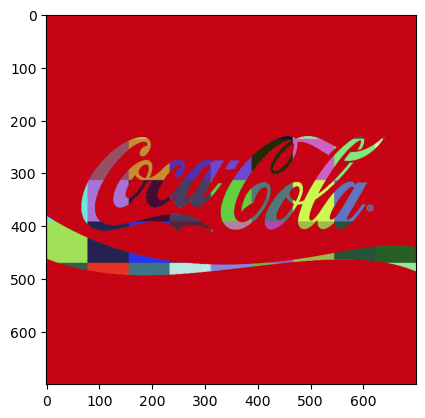

In [70]:
result = cv2.add(img_foreground, img_background)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:,:,::-1])